<a href="https://colab.research.google.com/github/Honika-S/Liver-Disease-Prediction-/blob/main/ensemble_hepatitis_94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_palette('bright')

In [3]:
data = pd.read_csv('/content/HepatitisCdata.csv').drop(['Unnamed: 0'], axis=1)
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Separate Category Column to Target and Category Columns

In [4]:
data[['Target', 'Category']] = data['Category'].str.split('=', expand=True)
data = data.drop(['Category'], axis=1)
data['Sex'] = data['Sex'].replace({'m':0, 'f':1})
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Target
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,3
611,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,3
612,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,3
613,46,1,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    int64  
 1   Sex     615 non-null    int64  
 2   ALB     614 non-null    float64
 3   ALP     597 non-null    float64
 4   ALT     614 non-null    float64
 5   AST     615 non-null    float64
 6   BIL     615 non-null    float64
 7   CHE     615 non-null    float64
 8   CHOL    605 non-null    float64
 9   CREA    615 non-null    float64
 10  GGT     615 non-null    float64
 11  PROT    614 non-null    float64
 12  Target  615 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


In [6]:
data.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,0.386992,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,0.487458,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,0.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,0.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,1.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [7]:
data.isna().sum()

Age        0
Sex        0
ALB        1
ALP       18
ALT        1
AST        0
BIL        0
CHE        0
CHOL      10
CREA       0
GGT        0
PROT       1
Target     0
dtype: int64

### Dropping Rows with NULL Values
---

In [8]:
data.dropna(inplace=True)
data.isna().sum()

Age       0
Sex       0
ALB       0
ALP       0
ALT       0
AST       0
BIL       0
CHE       0
CHOL      0
CREA      0
GGT       0
PROT      0
Target    0
dtype: int64

### Number of Unique Values in Target Column
---

In [9]:
data['Target'].value_counts()

Target
0     526
3      24
1      20
2      12
0s      7
Name: count, dtype: int64

### Ploting CountPlot to Visualize the amount of unique values of Target Variable
---

<Axes: xlabel='Target', ylabel='count'>

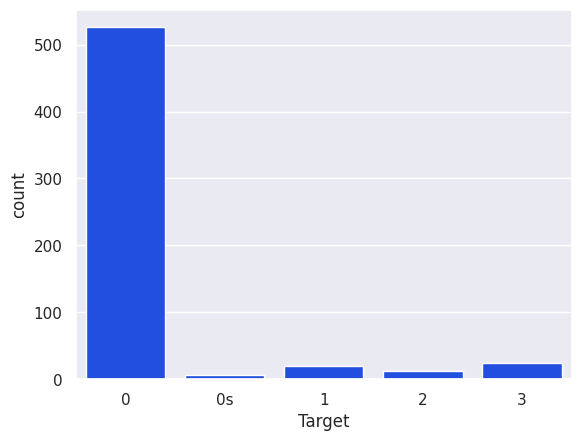

In [10]:
sns.countplot(data=data, x='Target')

In [11]:
data['Target'] = data['Target'].replace({'0s':4}).astype(int)
data.dtypes

Age         int64
Sex         int64
ALB       float64
ALP       float64
ALT       float64
AST       float64
BIL       float64
CHE       float64
CHOL      float64
CREA      float64
GGT       float64
PROT      float64
Target      int64
dtype: object

In [12]:
data.columns

Index(['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT', 'Target'],
      dtype='object')

## HistPlots
---

In [13]:
num_cols = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Target']

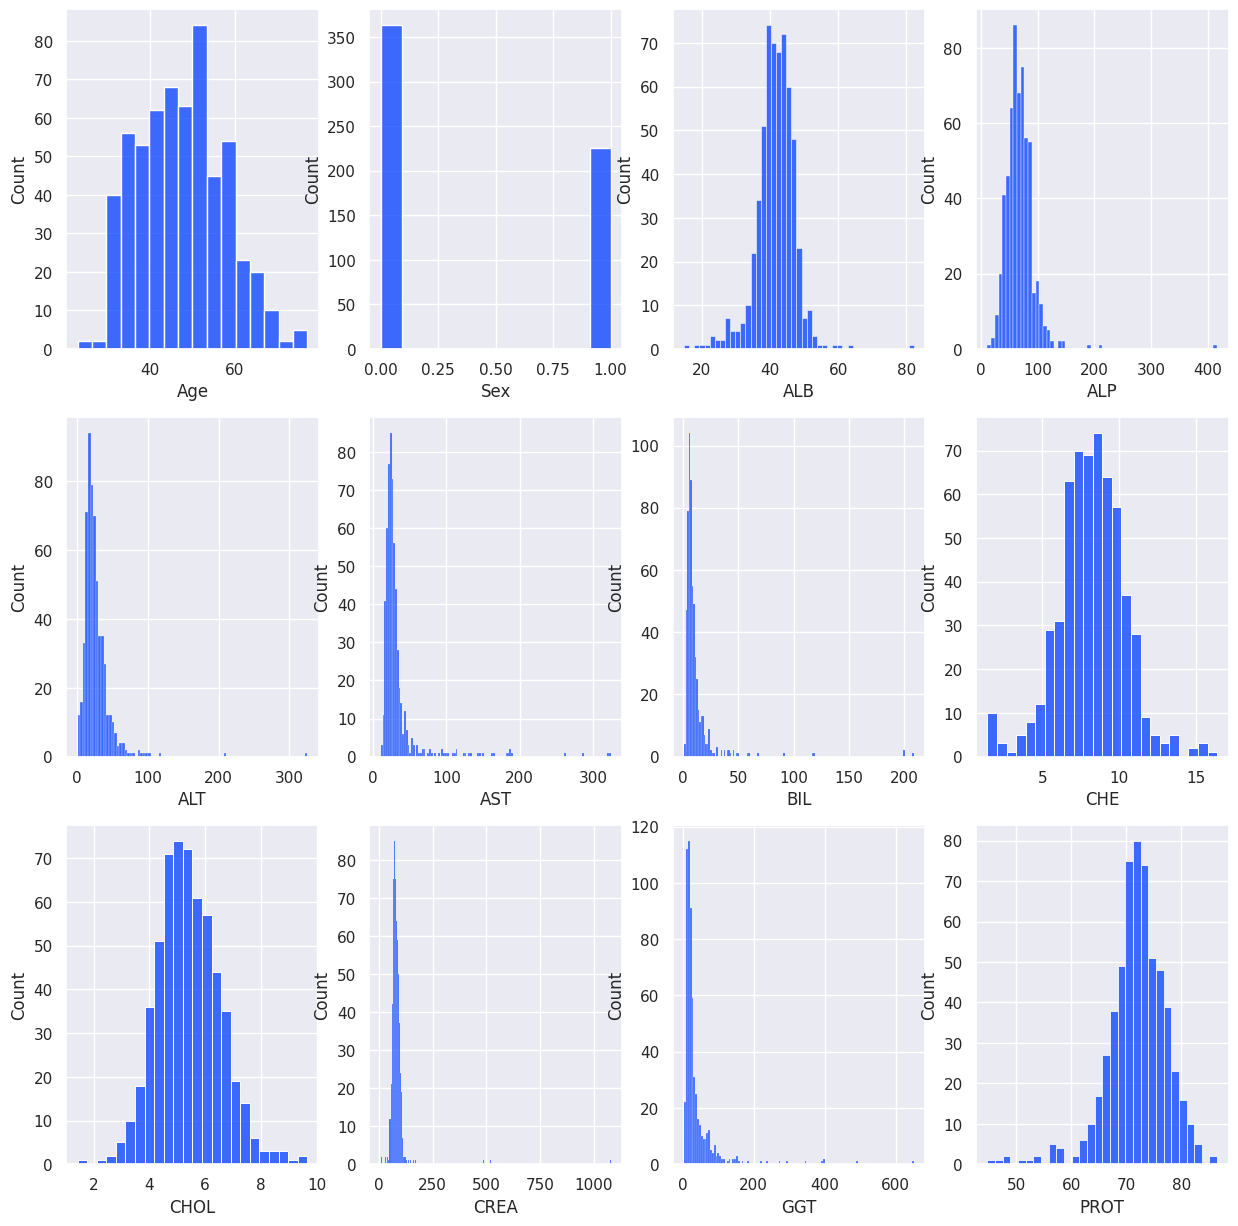

In [14]:
fig, axes = plt.subplots(3, 4, figsize=(15,15))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(data=data, x=col, ax=ax)

In [15]:
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Target
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,58,1,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,3
609,59,1,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,3
610,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,3
611,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,3


In [16]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


In [17]:
import xgboost as xgb
import catboost as cb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

In [18]:
data.isna().sum()

Age       0
Sex       0
ALB       0
ALP       0
ALT       0
AST       0
BIL       0
CHE       0
CHOL      0
CREA      0
GGT       0
PROT      0
Target    0
dtype: int64

In [19]:

print(data.isna().sum())

Age       0
Sex       0
ALB       0
ALP       0
ALT       0
AST       0
BIL       0
CHE       0
CHOL      0
CREA      0
GGT       0
PROT      0
Target    0
dtype: int64


In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5)
cb_model = cb.CatBoostClassifier(loss_function='MultiClass', verbose=False)
lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=5)

# Step 1: Preprocess the Data
X_train = data.drop(['Target'], axis=1)
y_train = data['Target']

# Step 2: Train the Models with k-fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'CatBoost': cb_model,
    'XGBoost': xgb_model,
    'LGBM': lgb_model
}

test_preds_EC1 = []
test_preds_EC2 = []
fold_scores = []

for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    fold_scores_itr = []

    print('='*70)
    for model_name, model in models.items():
        # Fit the model to the training data
        model_1 = model

        model_1.fit(X_fold_train, y_fold_train)

        # Generate probabilities on the validation data
        fold_probs = model_1.predict(X_fold_val)

        # Calculate ROC AUC for the fold
        fold_accuracy = accuracy_score(y_fold_val, fold_probs)

        # Add ROC Values to the lists
        fold_scores.append((model_name, fold_idx, fold_accuracy))

        fold_scores_itr.append(fold_accuracy)

        print(f"FOLD {fold_idx} ==> {model_name} ==> ROC: {fold_accuracy}")

    print('-'*70)
    print(f'Mean ROC AUC of FOLD {fold_idx} == {np.mean(fold_scores_itr)}')

FOLD 0 ==> CatBoost ==> ROC: 0.9491525423728814
FOLD 0 ==> XGBoost ==> ROC: 0.940677966101695
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1343
[LightGBM] [Info] Number of data points in the train set: 471, number of used features: 12
[LightGBM] [Info] Start training from score -0.114603
[LightGBM] [Info] Start training from score -3.382269
[LightGBM] [Info] Start training from score -3.852273
[LightGBM] [Info] Start training from score -3.210419
[LightGBM] [Info] Start training from score -4.363099
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [21]:
fold_scores

[('CatBoost', 0, 0.9491525423728814),
 ('XGBoost', 0, 0.940677966101695),
 ('LGBM', 0, 0.9491525423728814),
 ('CatBoost', 1, 0.9576271186440678),
 ('XGBoost', 1, 0.9661016949152542),
 ('LGBM', 1, 0.940677966101695),
 ('CatBoost', 2, 0.9745762711864406),
 ('XGBoost', 2, 0.9322033898305084),
 ('LGBM', 2, 0.9576271186440678),
 ('CatBoost', 3, 0.9491525423728814),
 ('XGBoost', 3, 0.9576271186440678),
 ('LGBM', 3, 0.9576271186440678),
 ('CatBoost', 4, 0.9316239316239316),
 ('XGBoost', 4, 0.9230769230769231),
 ('LGBM', 4, 0.9401709401709402)]

In [22]:
fold_scores_df = pd.DataFrame(fold_scores)
fold_scores_df

,0,1,2
0,CatBoost,0,0.949153
1,XGBoost,0,0.940678
2,LGBM,0,0.949153
3,CatBoost,1,0.957627
4,XGBoost,1,0.966102
5,LGBM,1,0.940678
6,CatBoost,2,0.974576
7,XGBoost,2,0.932203
8,LGBM,2,0.957627
9,CatBoost,3,0.949153


In [23]:
pd.DataFrame({
    'CatBoost': np.mean(fold_scores_df[fold_scores_df[0] == 'CatBoost'][2], axis=0),
    'XGBoost': np.mean(fold_scores_df[fold_scores_df[0] == 'XGBoost'][2], axis=0),
    'LGBM': np.mean(fold_scores_df[fold_scores_df[0] == 'LGBM'][2], axis=0),
    'Mean': np.mean(fold_scores_df[2], axis=0)
}, index=[0]).style.background_gradient(cmap='Blues')


,CatBoost,XGBoost,LGBM,Mean
0,0.952426,0.943937,0.949051,0.948472


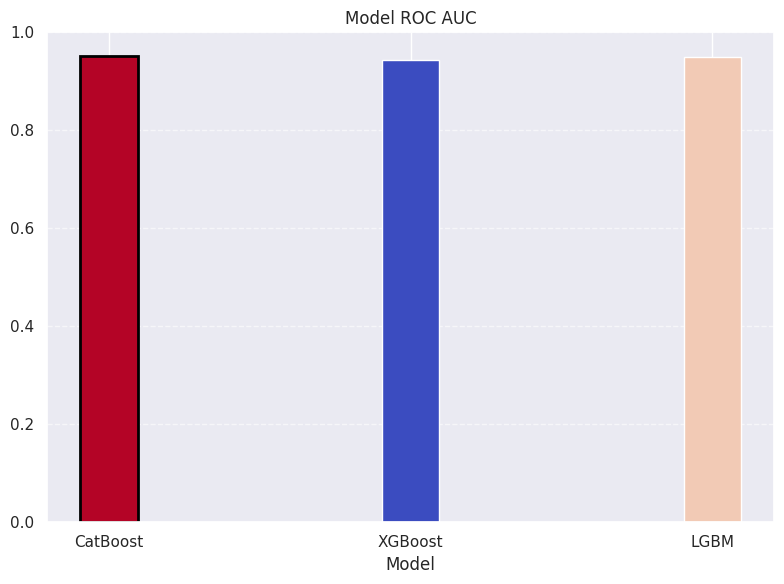

In [24]:
import matplotlib.pyplot as plt

# Provided accuracy values
accuracies = [0.9524260, 0.9439370, 0.9490510]  # Assuming these are ROC AUC scores

# Adjust model names if necessary
model_names = ['CatBoost', 'XGBoost', 'LGBM']

bar_widths = [accuracy * 0.2 for accuracy in accuracies]  # Adjust scaling factor

# Create a colormap for highlighting based on accuracy (adjust color scheme)
cmap = plt.cm.coolwarm  # Adjust colormap as desired

# Normalize accuracy values for colormap (0 to 1 range)
norm = plt.Normalize(min(accuracies), max(accuracies))

# Create bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bars = plt.bar(model_names, accuracies, color=cmap(norm(accuracies)), width=bar_widths)



plt.title('Model ROC AUC')
plt.xlabel('Model')


plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add subtle gridlines
plt.tight_layout()  # Adjust layout for aesthetics


# Highlight the highest accuracy bar with a thicker border
highest_accuracy_index = accuracies.index(max(accuracies))
bars[highest_accuracy_index].set_edgecolor('black')
bars[highest_accuracy_index].set_linewidth(2)  # Adjust border width

# Display the plot
plt.show()


In [25]:
import joblib
# Save the trained model to disk
joblib.dump(cb_model, 'trained_model.joblib')

['trained_model.joblib']

In [ ]:
! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com
! streamlit run app.py & npx localtunnel --port 8501

35.230.30.143



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.230.30.143:8501

npx: installed 22 in 4.474s
your url is: https://clean-cows-thank.loca.lt
